In [1]:
from matplotlib.colors import ListedColormap
import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
#from sklearn.metrics import plot_roc_curve
#from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [2]:

def mostrar(X, y, clasificador=None, title=None):
    """
    Esta función muestra las fronteras de decisión del clasificador ya entrenado y los ejemplos en X
    (con el color dependiendo de y).
    :param clasificador: Clasificador entrenado de scikit-learn
    :param X: Matriz con los ejemplos a mostrar
    :param y: Vector con las salidas de los ejemplos a mostrar
    :return: Nada
    """
    # Creamos los mapas de colores a utilizar
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#FFFF00', '#0000FF'])

    # Creamos la figura
    plt.figure(figsize=(10,8))

    # Primer plot a la izquierda
    plt.subplot(111)

    if clasificador is not None:
        # Preparamos los ejemplos de entrada para poder pintar la frontera de decisión
        # Asignamos una clase (color) a cada ejemplo de la malla en [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() * 0.9-0.05, X[:, 0].max() * 1.1
        y_min, y_max = X[:, 1].min() * 0.9-0.05, X[:, 1].max() * 1.1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))

        # Clasificamos los puntos
        # <RELLENAR>
        Z = clasificador.predict(np.hstack((xx.reshape(-1,1),yy.reshape(-1,1))))
        # Ponemos el resultado en el formato deseado
        # <RELLENAR>
        Z = Z.reshape(xx.shape)
        # Pintamos las fronteras
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    
    # Pintamos los puntos
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=60)
    # Asignamos el título
    plt.xlabel('Variable 1')
    plt.ylabel('Variable 2')
    if title is None:
        plt.title("Ejemplos de Train")
    else:
        # Establecemos el título recibido como parámetro
        # <RELLENAR>
        plt.title(title)    
    
    if clasificador is not None:
        # Establecemos los límites
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())

    
    # Mostramos la figura
    plt.show()
    return

In [14]:
#!pip install imblearn
#from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import load_breast_cancer
from imblearn.datasets import make_imbalance

data = load_breast_cancer()
X, y = data.data, data.target
print('Distribution before imbalancing: {}'.format(Counter(y)))
print("Total samples: {}".format(X.shape[0]))




Distribution before imbalancing: Counter({1: 357, 0: 212})
Total samples: 569


Distribution after imbalancing: Counter({1: 357, 0: 12})


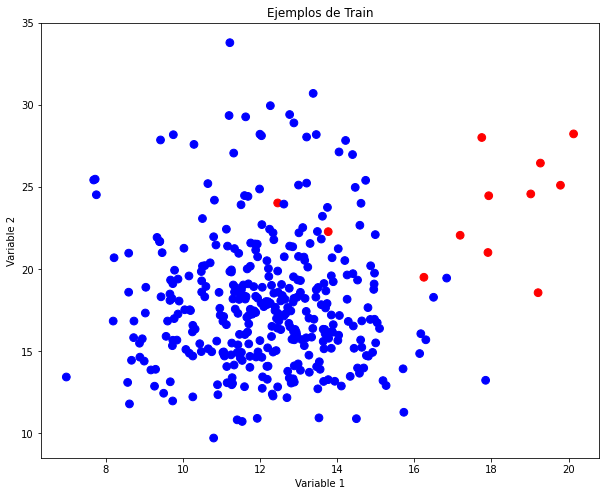

In [15]:
X_imb, y_imb = make_imbalance(X, y,sampling_strategy={0: 12, 1: 357},random_state=42)
print('Distribution after imbalancing: {}'.format(Counter(y_imb)))

Xtrain,ytrain = X_imb[:,:2],y_imb
mostrar(Xtrain,ytrain)

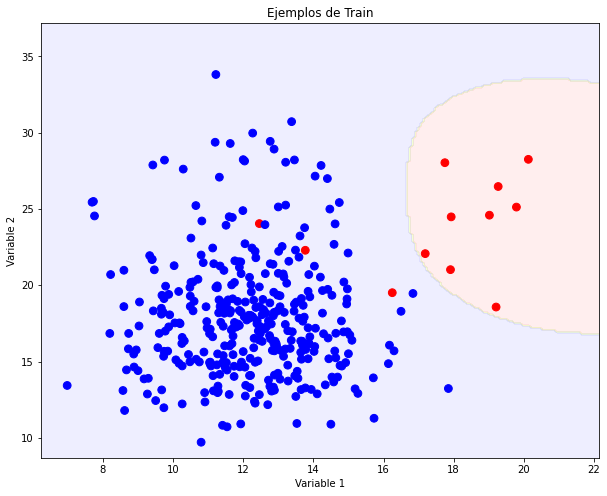

In [16]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(Xtrain,ytrain)
mostrar(Xtrain,ytrain,clf)

In [35]:
ip = initialize_population(Xtrain,ytrain)
vo = ip[0]
vd = diferential_mutation(ip,vo)

In [58]:
import numpy as np
from random import randint,random
def majority_class(X,y):
    return X[y==1]
def minority_class(X,y):
    return X[y==0]
def undersample(X,y,H=10):
    D = X.shape[1]
    majority_instances = majority_class(X,y)
    minority_instances = minority_class(X,y)

    #H different clustering processes
    clustering_centers = np.empty((H,2,D))
    for t in range(H):
        clustering_centers[t] = DE_guided_clustering(X,y)
    
    #compute clustering stability for each sample of the majority class
    clustering_stability = np.empty(X.shape[0])
    for i in range(majority_instances.shape[0]):
        
        
        
        
    
def DE_guided_clustering(X,y):
    D = X.shape[1]
    pop = initialize_population(X,y)
    fit_vector = fitness(pop)
    last_best_fitness = 0
    best_fitness = np.max(fit_vector)
    while abs(best_fitness-last_best_fitness)>0.0001:
        last_best_fitness = best_fitness
        for i in pop.shape[0]:
            vo = pop[i]
            vd = diferential_mutation(pop,vo)
            vp = binomial_crossover(vo,vd)

            #selection
            fitvp = fitness(vp)
            fitvo = fit_vector[i]
            if fitvp>fitvo:
                pop[i] = vp
                fit_vector[i] = fitvp
        best_fitness = np.max(fit_vector)
    cluster_centers = pop[np.argmax(fit_vector)]
    return cluster_centers
    
def random_centers(majority_samples,minority_samples):
    majority_center_idx = randint(0,majority_samples.shape[0]-1)
    #print("Selected index for majority class samples: {}".format(majority_center_idx))
    minority_center_idx = randint(0,minority_samples.shape[0]-1)
    #print("Selected index for minority class samples: {}".format(minority_center_idx))
    maj_center = majority_samples[majority_center_idx]
    min_center = minority_samples[minority_center_idx]
    return np.vstack((min_center, maj_center))

#The initial population is randomly chosen from the sample set
def initialize_population(X,y,Np=None):
    if Np is None:
        Np = int(15*X.shape[1]/2)
    majority_samples = majority_class(X,y)
    minority_samples = minority_class(X,y)
    
    initial_pop = np.empty((Np,2,X.shape[1]))
    for i in range(Np):
        generated_centers = random_centers(majority_samples,minority_samples)
        #evitar que se generen dos cromosomas iguales
        #while generated_centers in initial_pop:
            #generated_centers = random_centers(majority_samples,minority_samples)
        initial_pop[i] = generated_centers
    return initial_pop
        

#v es el vector objetivo con el que cruzaremos el vector mutante resultante de la función
def diferential_mutation(X,v,F=0.5):
    #obtener aleatoriamente otros 3 vectores de la población DISTINTOS ENTRE SÍ Y CON EL VECTOR OBJETIVO v
    xr1 = X[randint(0,X.shape[0]-1)]
    while((xr1 == v).all()):
        xr1 = X[randint(0,X.shape[0]-1)]
    xr2 = X[randint(0,X.shape[0]-1)]
    while((xr2 == v).all() or (xr2 == xr1).all() ):
        xr2 = X[randint(0,X.shape[0]-1)]
    xr3 = X[randint(0,X.shape[0]-1)]
    while((xr3 == v).all() or (xr3 == xr2).all() or (xr3 == xr1).all() ):
        xr3 = X[randint(0,X.shape[0]-1)]
    
    v_donor = xr1 + F*(xr2-xr3)
    return v_donor

def binomial_crossover(vo,vd,CR=0.5):
    vp = np.empty((vo.shape[0],vo.shape[1]))
    jrand = randint(0,vo.shape[1]-1)
    print("jrand = {}".format(jrand))
    for i in range(vo.shape[0]):
        for j in range(vo.shape[1]):
            r = random()
            print(r)
            if r<=CR or j==jrand:
                vp[i,j] = vd[i,j]
            else:
                vp[i,j] = vo[i,j]
    return vp
def exponential_crossover(vo,vd,CR=None):
    n = randint(0,vo.shape[1]-1)
    if CR is None:
        L = randint(0,vo.shape[1]-1)
    else:
        L = 0
        while True:
            L += 1
            r = random()
            print(r)
            if r<=CR and L<=vo.shape[1]:
                break
    print(n)
    print(L)
    vp = np.empty((vo.shape[0],vo.shape[1]))
    if n+L-1>vo.shape[1]:
        for i in range(vo.shape[0]):
            for j in range(n,vo.shape[1]):
                vp[i,j] = vd[i,j]
            for j in range(n+L-1-vo.shape[1]):
                vp[i,j] = vd[i,j]
            for j in range(n+L-1-vo.shape[1],n):
                vp[i,j] = vo[i,j]
    else:
        for i in range(vo.shape[0]):
            for j in range(n,n+L-1):
                vp[i,j] = vd[i,j]
            for j in range(n+L,vo.shape[1]):
                vp[i,j] = vo[i,j]
            for j in range(0,n):
                vp[i,j] = vo[i,j]
            
    return vp

def fitness():
    #################

    
def compute_cluster_stability(x,y,cluster_centers,H):
    cluster_stability = 0
    for t in range(cluster_centers.shape[0]):
        dist_to_minClass = np.linalg.norm(x - cluster_centers[t,0])
        dist_to_majClass = np.linalg.norm(x - cluster_centers[t,1])
        prediction = np.argmin(np.hstack((dist_to_minClass,dist_to_majClass)))
        
        if prediction==y:
            cluster_stability += 1
        

In [68]:

randvo = np.random.rand(2,10)
randvd = np.random.rand(2,10)
dist_to_majClass = np.linalg.norm(randvo[0] - randvo[1])
dist_to_minClass = np.linalg.norm(randvd[0] - randvd[1])

print(dist_to_minClass)
print(dist_to_majClass)
distances = np.hstack((dist_to_minClass,dist_to_majClass))
print(distances)
np.argmin(distances)

0.901153884115414
0.8533733179635765
[0.90115388 0.85337332]


1